# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wavely.signal.features.features import FeaturesComputer
from wavely.signal.units.helpers import split_signal

# FeaturesComputer

### Introduction

This notebook demonstrates how to use the `features` module. FeaturesComputer is build upon the numpy ecosystem and allows to easily extract different kind of features from a numpy array containing audio data.
The module is also build to ease addition of new features, not present in the base module.
The module is meant to be used with numpy to manipulate audio data, and pandas to manipulate extracted features.

## Create an audio signal


In [2]:
sr = 192000
N = int(0.5 * sr) # 0.5 second of audio
t = np.arange(N) / sr

x = np.zeros(N)

# some sines
x[:N//2] += np.sin(2 * np.pi * 23000. * t[:N//2]) # sinwave f = 23000
x[N//2:] += np.sin(2 * np.pi * 43000. * t[N//2:]) # sinwave f = 43000

# some with noise
x[:N//2] += np.random.rand(N//2) * 0.1
x[N//2:] += np.random.rand(N//2) * 0.5 

#some impulses
x[int(0.1 * sr)] += 0.3
x[int(0.343 * sr)] += 0.2
x[int(0.43 * sr)] += 0.5

We split the audio signal into blocks of 4096 samples (in practice, unless we need to process very small audio files or short signals, the signal will always be formatted in blocks of a given sample size).

In [3]:
block_size = 4096  # block size
# reshape
blocks = split_signal(x, sr, block_size / sr)
blocks.shape

/home/maxime/Repositories/signal/wavely/signal/units/helpers.py:48: UserWarning: Since the step is not multiple of the length of the signal, `split_signal` will crop the final element of the new sliced signal.
  "Since the step is not multiple of the "


(23, 4096)

### Computing the features

We use the `FeaturesComputer` class. The constructor takes the following parameters:
  * `n`: the size of the audio blocks that are going to be computed.
  * `rate`: the sample rate of the audio blocks that are going to be computed.
  * `n_fft`: the size of block that are going to be use for computing the FFT. If `n_fft` < `n`, the blocks will be truncated, if `n_fft` > `n`, the blocks will be zero-padded.
  * `window`: a function that takes an integer and returns an array of the corresponding size containing a window that is applied to the blocks before the FFT.

The audio blocks are then parsed using the method `compute`. This function returns a dictionary containing the different features with their label and their value.

In [4]:
fc = FeaturesComputer(
    block_size=block_size, 
    rate=sr, 
    n_fft=block_size, 
    window=np.hanning, 
    features=['spl','audiblelevel']
)

In [5]:
feats = fc.compute(blocks)
feats

{'audiblelevel': array([68.2221102 , 68.45133747, 68.11956259, 68.33672741, 68.31097189,
        68.21315925, 68.44857417, 68.36601601, 68.21009416, 68.34385638,
        68.2621687 , 72.35243195, 82.12506582, 82.30892663, 82.26816911,
        82.30204642, 82.16894009, 82.16454407, 82.12273136, 82.21087083,
        82.19331238, 82.21168708, 82.26365086]),
 'spl': array([90.999345  , 91.00097744, 90.99724265, 91.00598498, 91.00185422,
        91.00361831, 91.00593673, 90.99923683, 91.00023898, 90.99505194,
        91.01025048, 91.14744907, 91.63475275, 91.68099009, 91.65552007,
        91.68115908, 91.65954344, 91.63670615, 91.64417108, 91.66916223,
        91.63095272, 91.64257317, 91.65317202])}

Some intermediate values are computed but not exported (see :ref:`audiofeature-label`).

All the values computed by the object can be retrieved using ``af[name]``, for example to plot the spectrum corresponding to the first audio block:


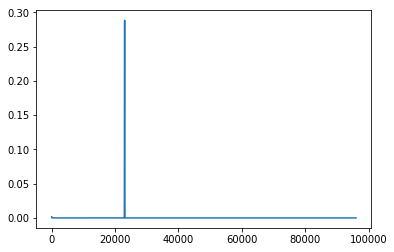

In [6]:
spectrum = fc['periodogram'][0]  # get the spectrum corresponding to the first audio block
frequencies = np.arange(spectrum.size) / block_size * sr
plt.plot(frequencies, spectrum)
plt.show()

The spectrogramm can also be easily plotted, since it has already been computed.

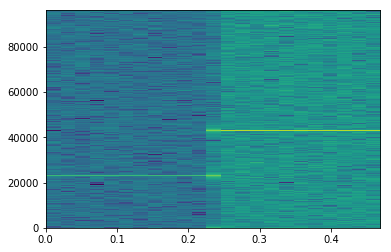

In [7]:
spectrum = fc['periodogram']
freq = np.arange(spectrum.shape[1]) / block_size * sr
time = np.arange(spectrum.shape[0]) * block_size / sr

plt.imshow(np.flip(np.log(spectrum.T), 0), aspect='auto',
           extent = [time[0], time[-1], freq[0], freq[-1]])
plt.show()